In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris

# single sample t test

In [2]:
df = load_iris()

In [5]:
x = pd.DataFrame(df.data, columns = df.feature_names)

In [6]:
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
pop = x['sepal length (cm)']

In [8]:
pop

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal length (cm), Length: 150, dtype: float64

In [9]:
pop.mean()

5.843333333333334

In [10]:
# H0 : mean of sepal lenght is 5
# H1 : mean of sepal length is greater than 5

In [32]:
sample = pop.sample(25)

In [33]:
sample = sample.values

In [34]:
sample

array([6.1, 7. , 5. , 4.4, 6.6, 5. , 5.6, 5.8, 5.3, 4.6, 6.1, 6. , 5.8,
       5. , 6.2, 5.1, 6. , 5.4, 6.3, 6.7, 6.1, 4.8, 6.7, 6.9, 5.9])

(array([2., 1., 4., 2., 1., 3., 6., 1., 3., 2.]),
 array([4.4 , 4.66, 4.92, 5.18, 5.44, 5.7 , 5.96, 6.22, 6.48, 6.74, 7.  ]),
 <BarContainer object of 10 artists>)

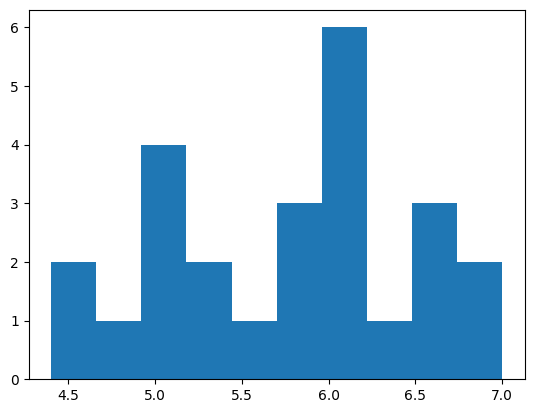

In [35]:
plt.hist(sample)

In [36]:
from scipy.stats import shapiro

In [37]:
sample_length = shapiro(sample)

In [38]:
print(sample_length)

ShapiroResult(statistic=0.9645305654388434, pvalue=0.5118413592159514)


In [39]:
pop_mean = 5

In [40]:
import scipy.stats as stats

In [41]:
t_statistics, p_value = stats.ttest_1samp(sample_length, pop_mean)

In [42]:
print(f'T-stats {t_statistics} and p-value {p_value}')

T-stats -18.82887411092457 and p-value 0.033779089295632406


In [43]:
alpha = 0.05
if p_value < alpha:
    print("Reject null hypo")
else:
    print("Fail to reject null hypo")

Reject null hypo


# independent 2 sample t test

In [48]:
pop

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal length (cm), Length: 150, dtype: float64

In [49]:
pop_1 = x['sepal width (cm)']

In [82]:
pop_1.mean()

3.0573333333333337

In [94]:
# H0 :  mean of sepal l == mean of sepal W
# H1 :  mean of sepal l < mean of sepal W

In [95]:
sample_sepal_length = pop.sample(25).values
sample_sepal_width = pop_1.sample(25).values

In [96]:
sample_SL = shapiro(sample_sepal_length)

In [97]:
sample_SW = shapiro(sample_sepal_width)

In [98]:
print(sample_SL, sample_SW)

ShapiroResult(statistic=0.9716041265267439, pvalue=0.6859426105806153) ShapiroResult(statistic=0.9680056614975288, pvalue=0.595018178818375)


In [99]:
t_statistics, p_value = stats.ttest_ind(sample_SL, sample_SW)

In [100]:
print(t_statistics, p_value)

0.2011935483438431 0.8591528699799633


In [101]:
alpha = 0.05
if p_value < alpha:
    print("Reject null hypo")
else:
    print("Fail to reject null hypo")

Fail to reject null hypo


In [102]:
pop.mean()

5.843333333333334

In [103]:
pop_1.mean()

3.0573333333333337